In [74]:
import os
import sys
import pandas as pd
import numpy as np
import regex as re
import mygene
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from tableanalyzer import *

In [2]:
mg = mygene.MyGeneInfo()

In [ ]:
mg.getgene("ENSG00000198938", 'name,symbol,refseq.rna,type_of_gene,exac.bp')

In [3]:
working_dir = "/Users/filippo/Developer/tesi"
os.chdir(working_dir)
dirs = os.listdir("data")

In [4]:
len(dirs)

8935

In [5]:
df = pd.read_csv(("%s/mainTable.csv"%working_dir))
genes = np.array([gene[:15] for gene in df.loc[:,'gene'].values])
df['gene'] = genes
#df = df.to_sparse(fill_value=0.)
df.head()

,gene,type_of_gene,85593c7d-7441-4d41-81d3-aaa17c7e398b.F,bfeaa9f7-e413-40b8-86ba-c9d26a96c240.F,426b94fe-fcff-49f2-9d0b-c7cb49bb5559.F,38083e21-7761-47c7-9112-769c7f85e283.F,6e2570b0-fc95-4ba9-a8a5-b79f6dea0246.F,21800024-cf76-4185-b57b-526539ccdba2.F,1f0f7598-d8c0-41ba-8b07-c958fecbb5f7.F,ea50d2da-4f84-46dc-8036-c34392793aed.F,...,bd556315-a050-465f-9a41-bdebe7e3eb61.F,fde7c419-b8c0-4e04-8512-0e3b8eadebda.F,46551ef6-d1de-43c3-8ea5-5ade8a5bffd7.F,1a587b92-0a11-47f0-83c2-77a2b6de1088.F,171f664b-3226-4944-9219-91d2a7fdfb5f.F,9c77be54-d58e-4dec-8894-acb71a12cac5.F,2556ce90-db5f-4beb-897a-db3cf556e054.F,234724ab-6f82-4ac9-9948-37ffd9c3e418.F,cd550979-69b5-43d0-9724-cc25eb502cb8.F,03872f69-93f5-4d6c-aeb3-dadbc2762682.F
0,ENSG00000167578,protein-coding,6.736458,3.268259,0.804157,4.580433,3.330552,3.467188,1.923817,4.086256,...,1.933432,4.589182,2.509192,1.182190,4.894803,3.463509,3.816159,2.281180,2.112157,11.051738
1,ENSG00000078237,protein-coding,4.449834,3.115587,1.536337,3.729699,3.989718,6.747617,3.787525,4.364158,...,4.181816,15.874804,2.699238,6.278986,3.378318,6.234426,5.366732,2.985039,4.456480,3.583194
2,ENSG00000146083,protein-coding,11.857529,10.490171,11.278336,15.763134,7.026520,6.234504,7.856885,7.712311,...,14.773654,36.555254,7.183867,9.524509,7.741472,6.791531,5.208533,22.101164,28.950562,3.587762
3,ENSG00000158486,protein-coding,0.025552,0.132116,0.018646,0.007770,0.136436,0.246969,0.074019,0.003425,...,0.063039,0.992413,0.046224,0.289472,0.004749,0.002170,0.014066,0.600335,0.344678,0.020937
4,ENSG00000198242,protein-coding,780.998079,191.102501,161.946102,81.949585,24.836712,107.257610,136.015286,123.804288,...,93.235194,310.230523,158.073024,175.187640,109.044850,238.139632,208.344332,140.324440,125.750051,295.949110


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19369 entries, 0 to 19368
Columns: 5002 entries, gene to 03872f69-93f5-4d6c-aeb3-dadbc2762682.F
dtypes: float64(5000), object(2)
memory usage: 739.2+ MB


In [26]:
ngenes = len(df['gene'])
nfiles = len(df.loc[0,:])-2
print("genes:%d\trealizations:%d"%(ngenes,nfiles))

genes:19369	realizations:5000


In [29]:
df = df.drop(labels='type_of_gene', axis=1)

In [476]:
df.to_csv("mainTable.csv", header=True, index=False)

## Means sigmas

In [10]:
df_mv = pd.read_csv("meanVariances.csv", index_col = [0])
df_mv = df_mv.loc[df_mv['type_of_gene']=='protein-coding']
df_mv.head()

,mean,variance,type_of_gene
ENSG00000167578,3.861123,6.342788,protein-coding
ENSG00000078237,4.457380,17.953745,protein-coding
ENSG00000146083,12.657677,48.880043,protein-coding
ENSG00000158486,0.154342,0.206602,protein-coding
ENSG00000198242,183.391178,18958.536245,protein-coding


In [11]:
means = df_mv['mean'].values
variances = df_mv['variance'].values
len(means)

19369

### plot

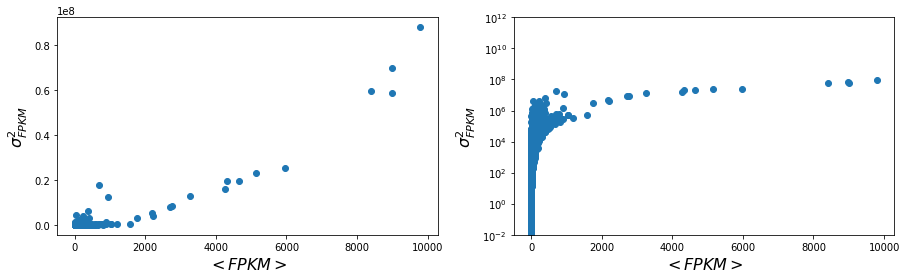

In [12]:
fig=plt.figure(figsize=(15,4))
plt.subplot(121)
plt.scatter(means, variances)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.subplot(122)
plt.scatter(means, variances)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
plt.ylim((1e-2,1e12))
plt.show()

In [13]:
fig.savefig("varmean.png")

### Distributions

In [14]:
len(means)

19369

In [15]:
len(variances)

19369

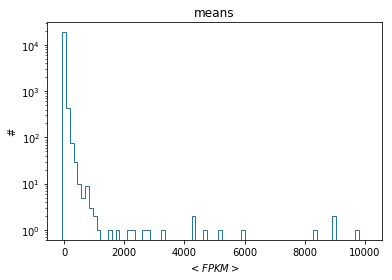

In [18]:
bins = 80
_range = (0-1e4*0.5/bins, 1e4+1e4*0.5/bins)
fig = plt.figure()
n, c, _ = plt.hist(means, density = False, range=_range, bins=bins, histtype='step')
plt.title("means")
plt.xlabel("$<FPKM>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("mean_distr.pdf")

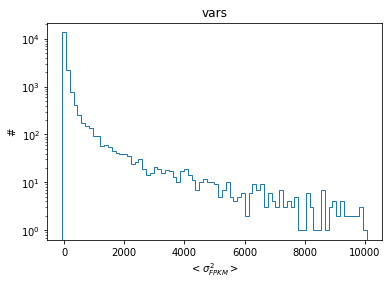

In [19]:
bins = 80
_range = (0-1e4*0.5/bins, 1e4+1e4*0.5/bins)
fig = plt.figure()
n, c, _ = plt.hist(variances, density = False, histtype='step', bins=bins, range=_range)
plt.title("vars")
plt.xlabel("$<\sigma_{FPKM}^2>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("var_distr.pdf")

# protein coding genes

In [20]:
protein_coding = pd.read_csv("genes.txt", header=[0], index_col=[0])
protein_coding.loc[protein_coding['type_of_gene']=='protein-coding'].index.values

array(['ENSG00000167578', 'ENSG00000078237', 'ENSG00000146083', ...,
       'ENSG00000105063', 'ENSG00000123685', 'ENSG00000181518'],
      dtype=object)

# expression plot

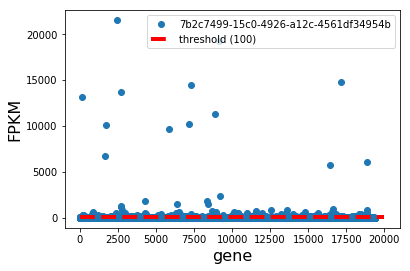

In [22]:
sample = 10
fig = plt.figure()
x = np.linspace(0, 20000)
key = df.keys()[sample]
plt.plot(df[key].to_dense(), 'o', label=key[:-2])
plt.plot(x, [100 for _ in x], 'r--', lw=4, label='threshold (100)')
plt.xlabel("gene", fontsize=16)
plt.ylabel("FPKM", fontsize=16)
plt.legend()
plt.show()

In [23]:
fig.savefig("singleFile.pdf")

# single gene

name: ENSG00000163736
FPKM mean:      17.21
FPKM var:  138493.83


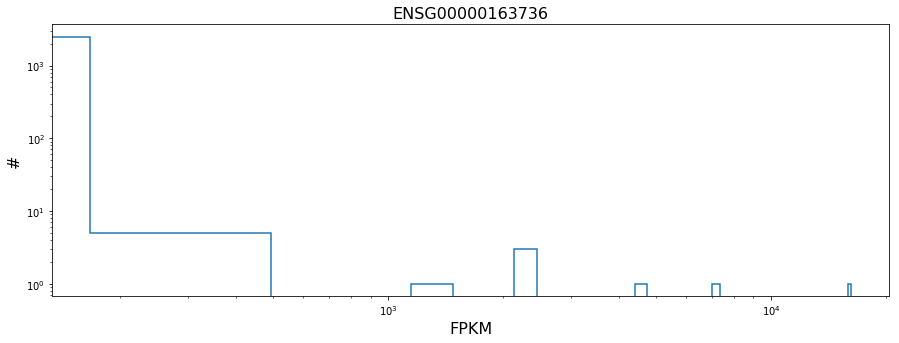

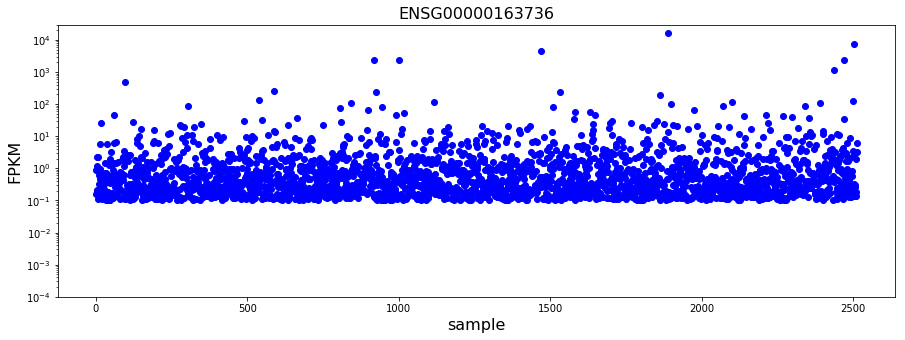

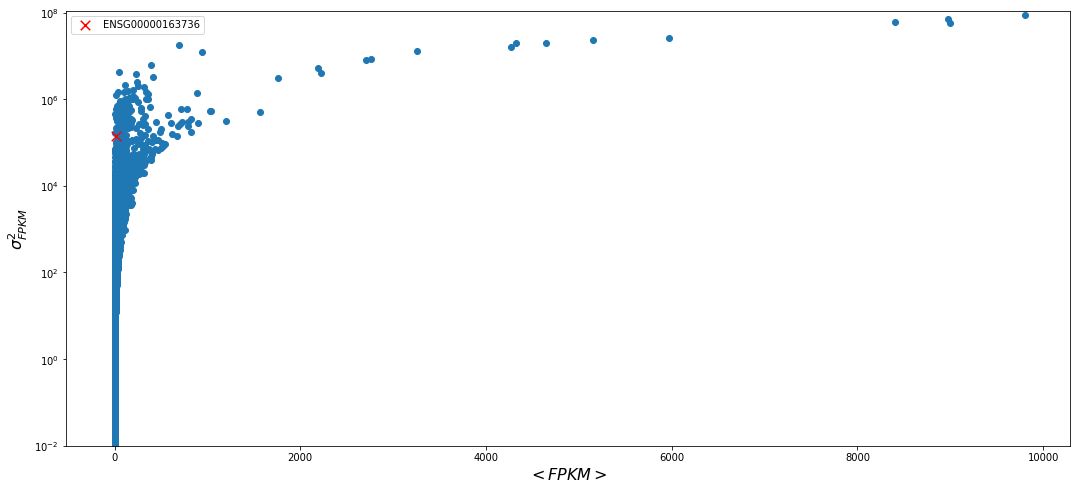

In [30]:
gene = geneinfo('ENSG00000163736', df, nfiles)
genedistr(gene, 50);
geneplot(gene);
genecoord(gene, means, variances);

# subset analysis

#### query genes

In [43]:
search_mean_max = 200
search_mean_min = 20
search_var_max = 1e12
search_var_min = 1e5
pc = True
if (pc):
    query_result = df_mv.loc[(df_mv['type_of_gene']=='protein-coding')&((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
else:
    query_result = df_mv.loc[((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
query_result

,mean,variance,type_of_gene
ENSG00000164326,20.282552,1.004537e+05,protein-coding
ENSG00000142789,20.964037,1.758003e+05,protein-coding
ENSG00000143632,22.223430,2.017623e+05,protein-coding
ENSG00000164816,25.978612,6.585681e+05,protein-coding
ENSG00000204983,28.538196,4.135720e+05,protein-coding
ENSG00000137392,28.636922,5.880864e+05,protein-coding
ENSG00000254647,29.306699,2.269048e+05,protein-coding
ENSG00000198183,31.307288,3.143984e+05,protein-coding
ENSG00000172551,31.326863,1.102073e+05,protein-coding
ENSG00000182333,31.330988,6.837518e+05,protein-coding


In [49]:
genesnames = []
for g in query_result.index.values[:15]:
    gene = geneinfo(g[:15], df, nfiles)
    genesnames.append(gene)

name: ENSG00000164326
FPKM mean:      97.76
FPKM var:  476774.90
name: ENSG00000142789
FPKM mean:     244.82
FPKM var: 1998938.69
name: ENSG00000143632
FPKM mean:      25.98
FPKM var:  235881.92
name: ENSG00000164816
FPKM mean:     219.00
FPKM var: 5510578.59
name: ENSG00000204983
FPKM mean:     111.96
FPKM var: 1613784.52
name: ENSG00000137392
FPKM mean:     126.79
FPKM var: 2592014.08
name: ENSG00000254647
FPKM mean:     557.10
FPKM var: 4019745.79
name: ENSG00000198183
FPKM mean:     183.91
FPKM var: 1819165.58
name: ENSG00000172551
FPKM mean:      77.02
FPKM var:  267527.87
name: ENSG00000182333
FPKM mean:     446.21
FPKM var: 9554933.83
name: ENSG00000172016
FPKM mean:     209.75
FPKM var: 1149766.30
name: ENSG00000170323
FPKM mean:      37.80
FPKM var:  221168.47
name: ENSG00000169344
FPKM mean:     373.21
FPKM var: 1695602.04
name: ENSG00000175535
FPKM mean:     704.06
FPKM var: 25778995.73
name: ENSG00000123454
FPKM mean:      70.68
FPKM var:  219544.06


### plot coordinates

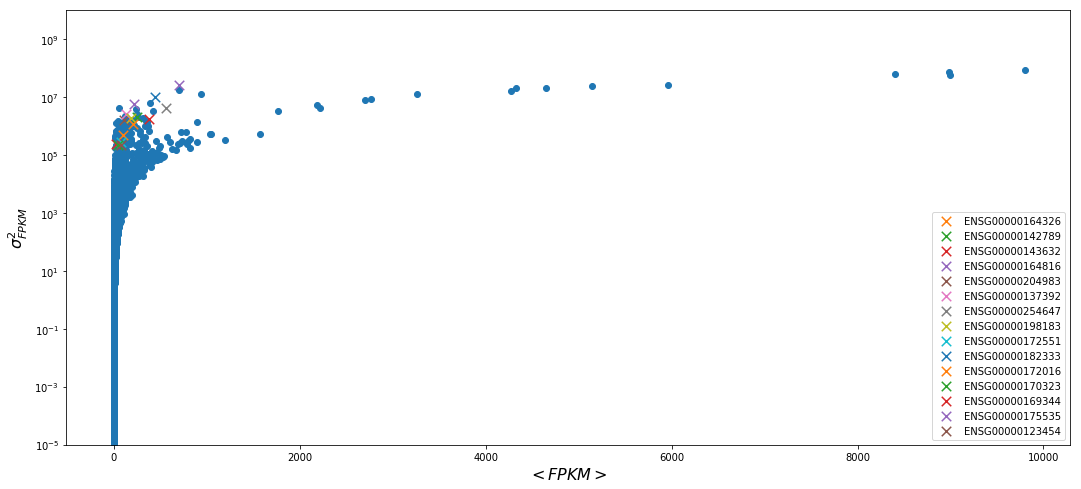

In [50]:
fig = plt.figure(figsize=(18,8))
plt.scatter(means, variances)
for g in genesnames:
    plt.scatter([g['avg']],[g['var']], marker='x', s=90, label=g['name'])
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
#plt.ylim((1e-5,1e8))
plt.ylim((1e-5,1e10))
plt.legend()
plt.show()
fig.savefig("plot/genes/subset.png")

### plot all

ENSG00000164326
mean: 97.756729
var: 476774.897992


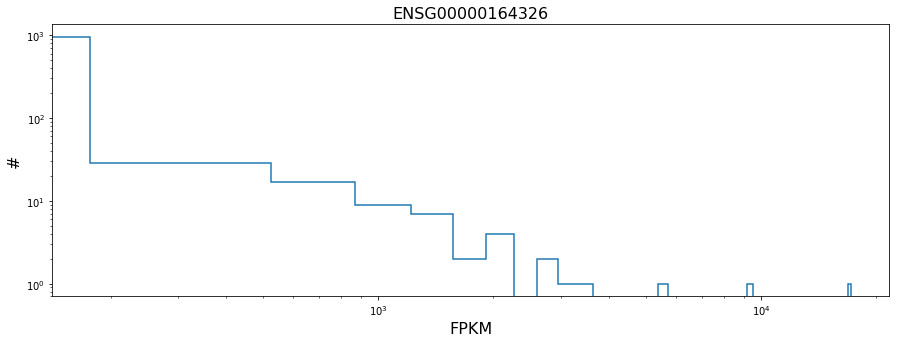

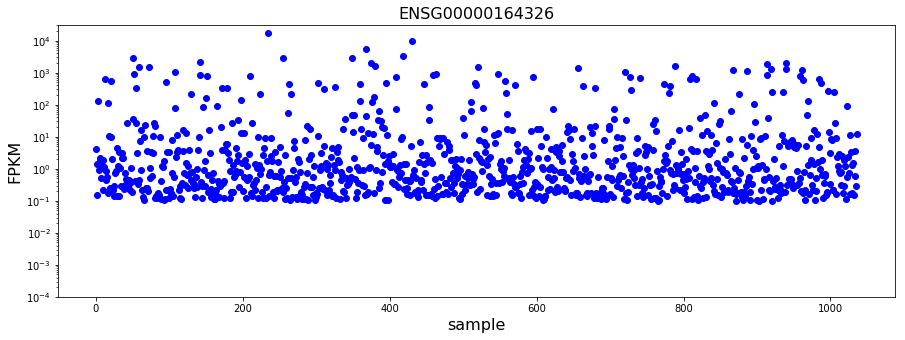

ENSG00000142789
mean: 244.821439
var: 1998938.694209


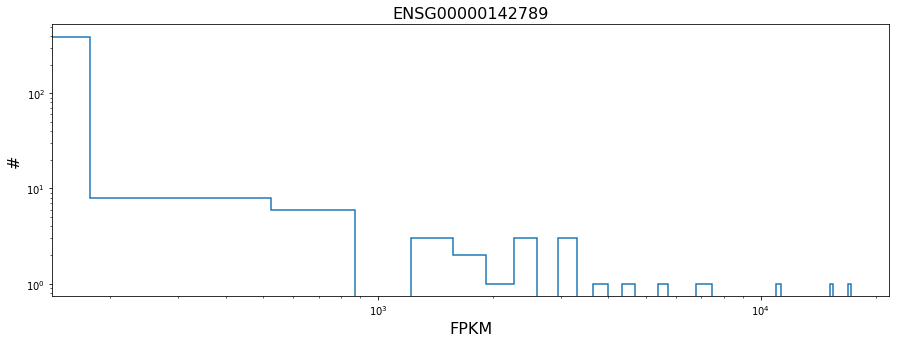

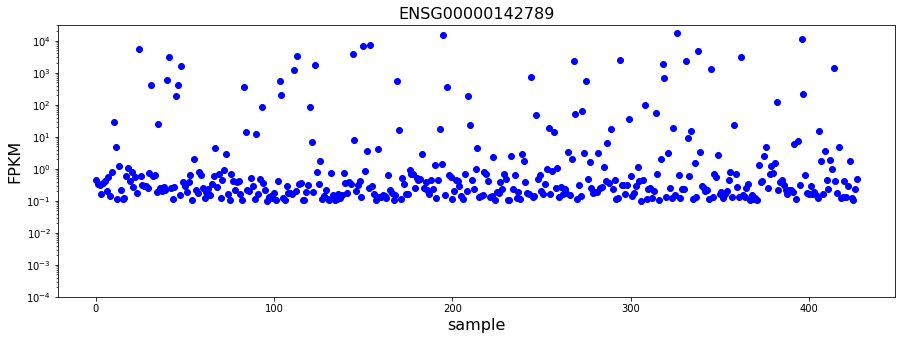

ENSG00000143632
mean: 25.981428
var: 235881.921364


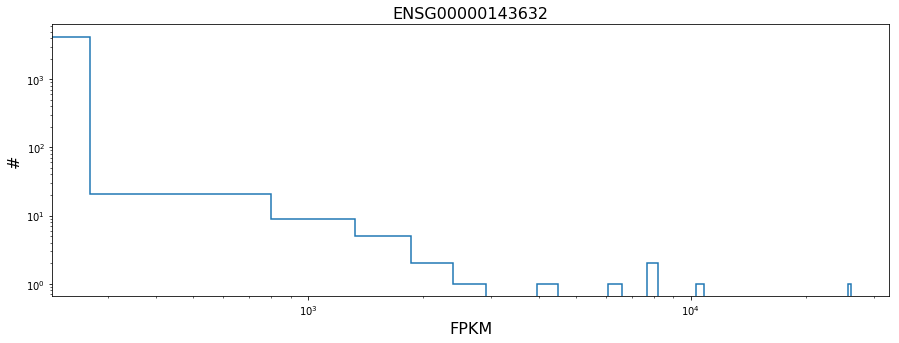

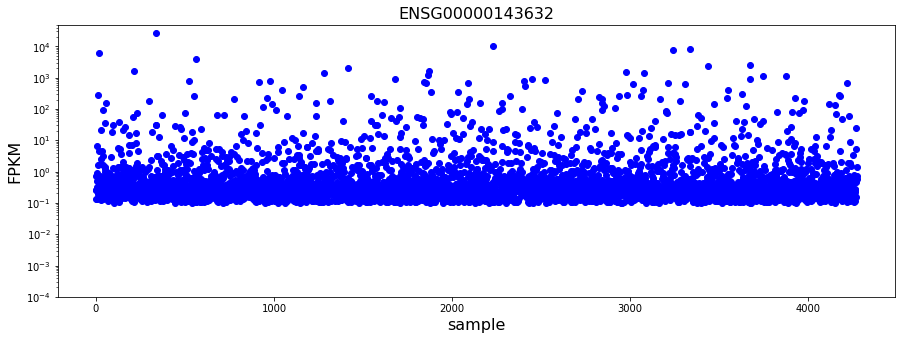

ENSG00000164816
mean: 219.003682
var: 5510578.591978


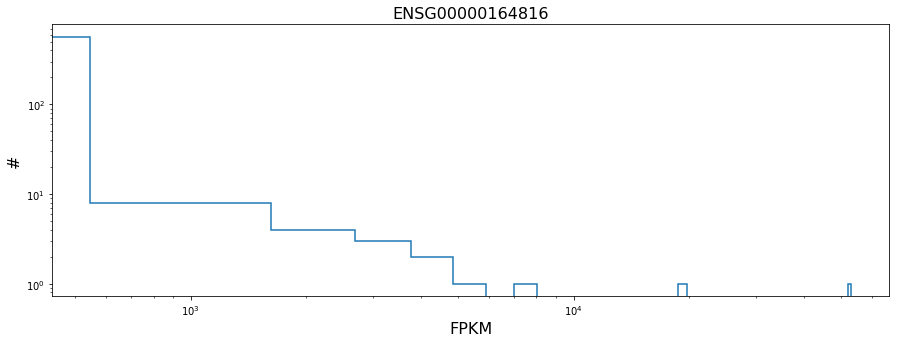

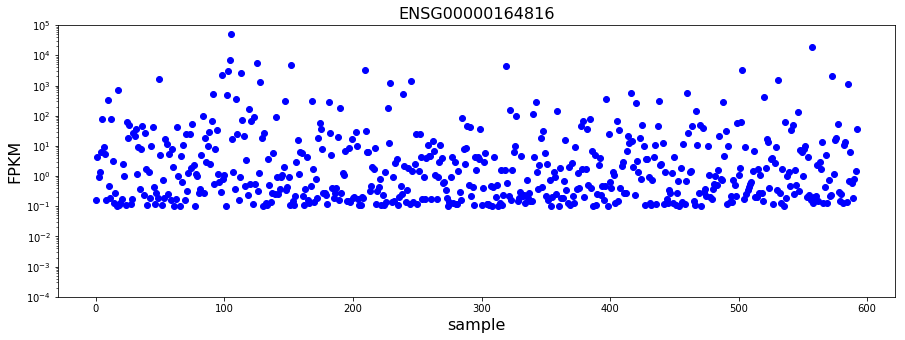

ENSG00000204983
mean: 111.963736
var: 1613784.516216


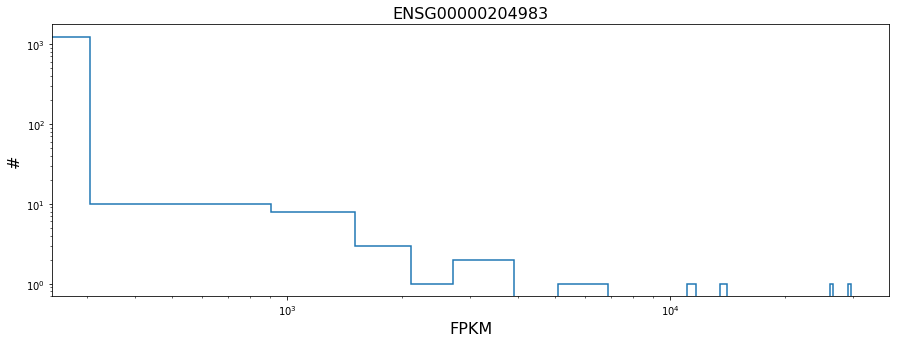

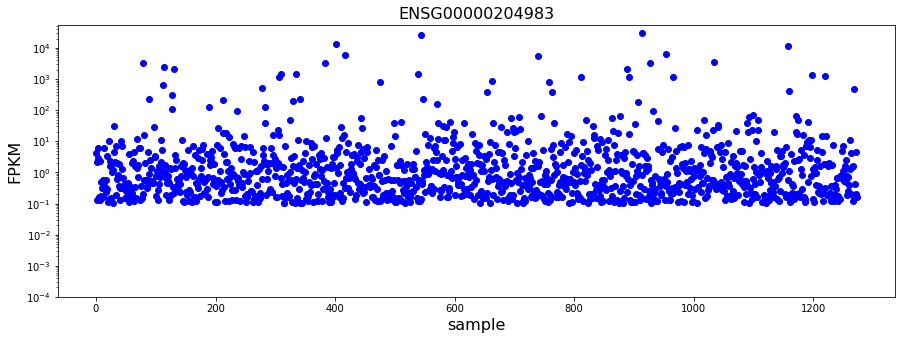

ENSG00000137392
mean: 126.787205
var: 2592014.084597


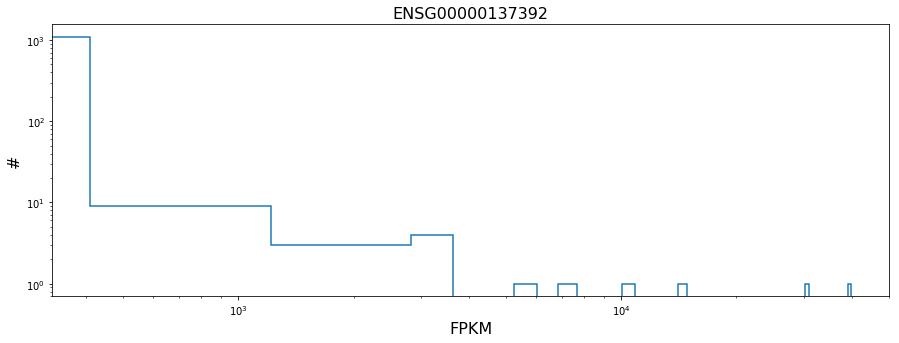

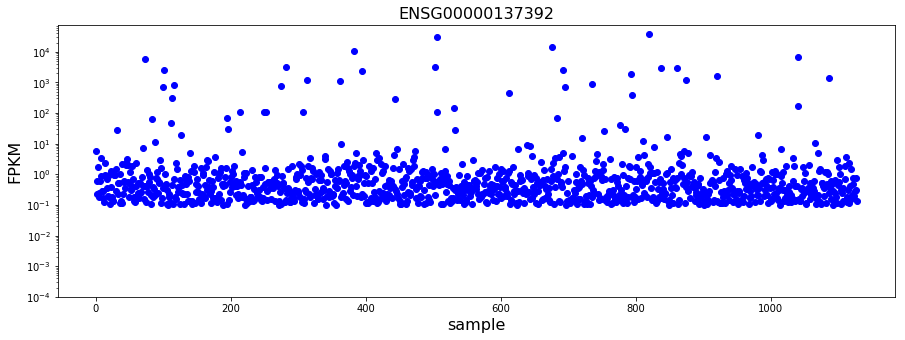

ENSG00000254647
mean: 557.101460
var: 4019745.790404


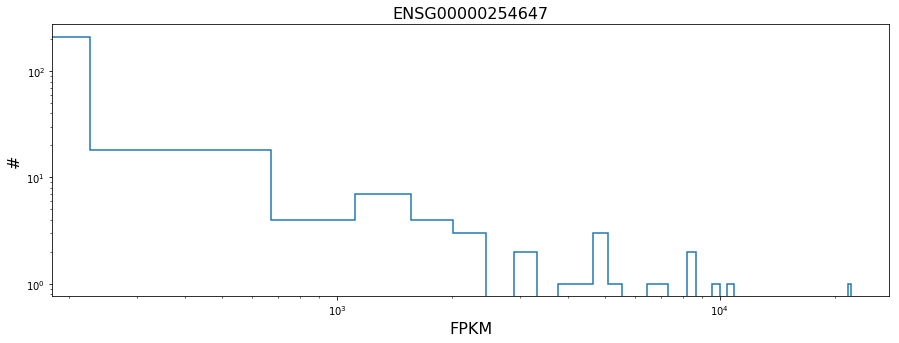

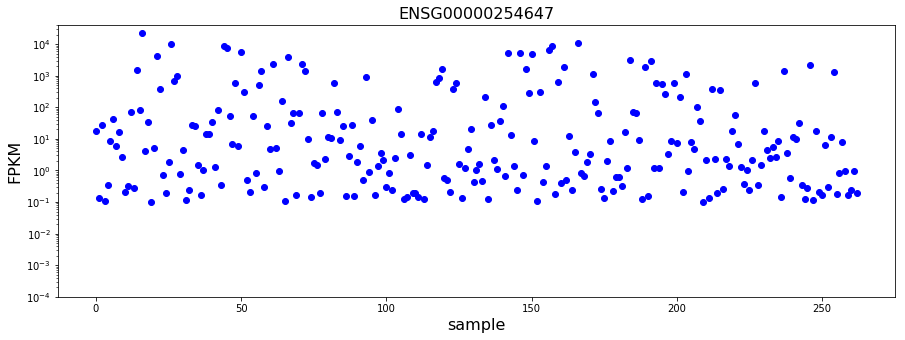

ENSG00000198183
mean: 183.908452
var: 1819165.578075


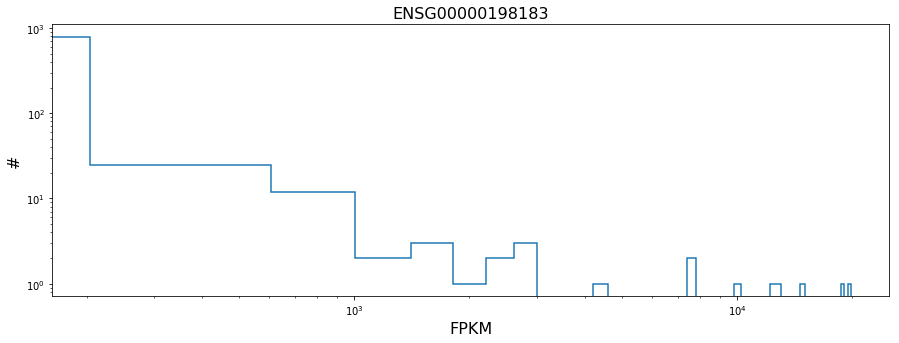

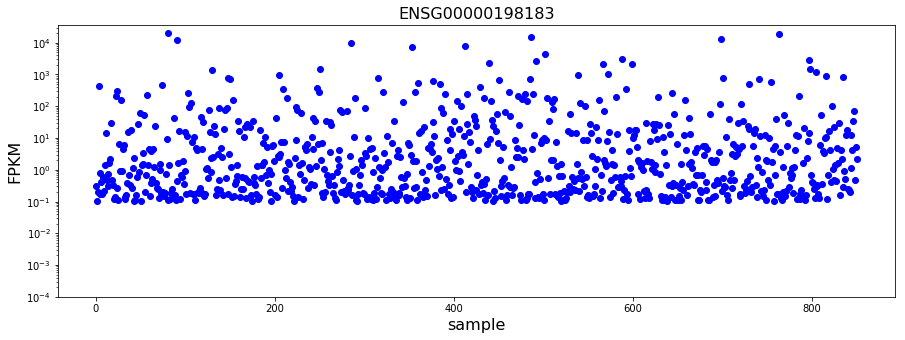

ENSG00000172551
mean: 77.018414
var: 267527.868524


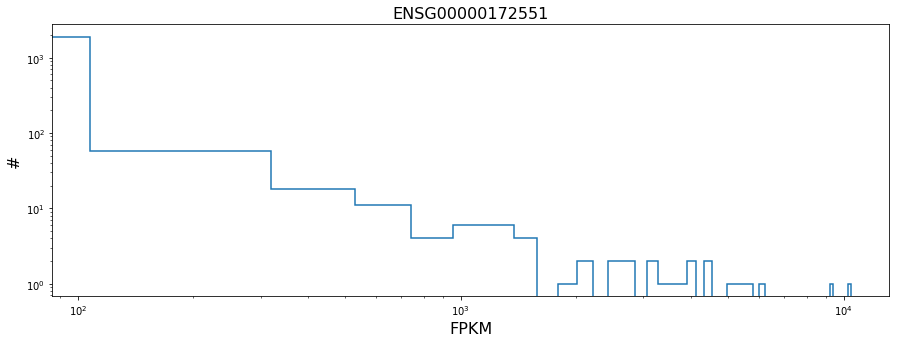

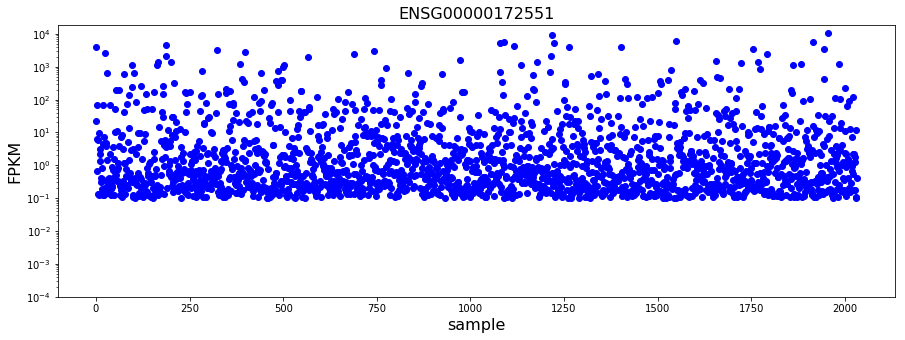

ENSG00000182333
mean: 446.211045
var: 9554933.828505


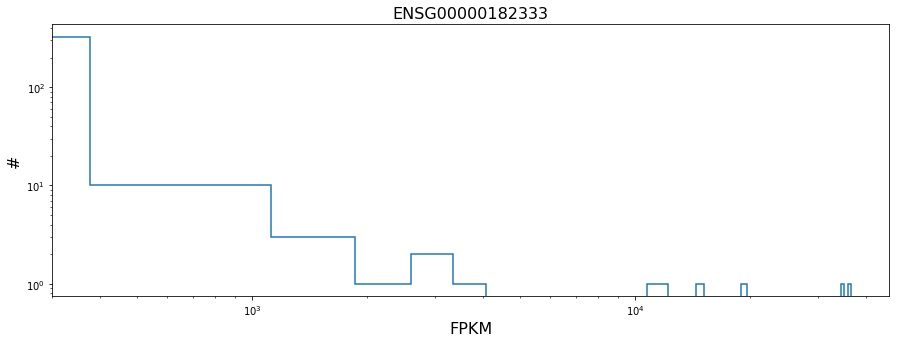

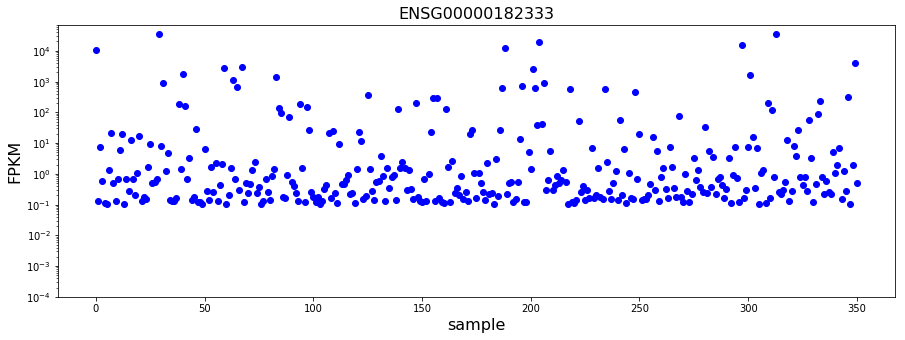

ENSG00000172016
mean: 209.752067
var: 1149766.300892


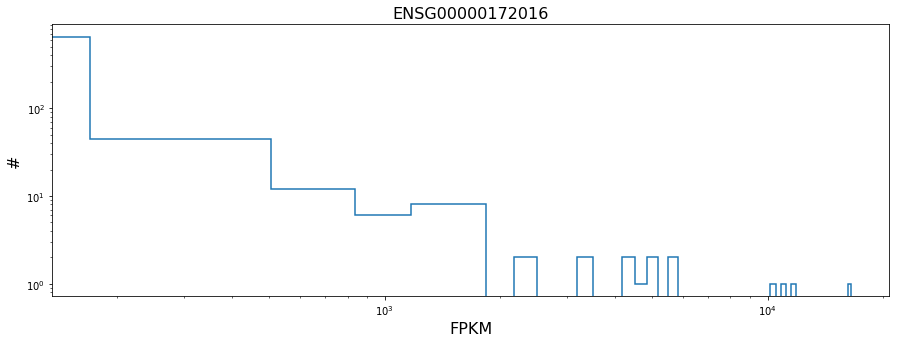

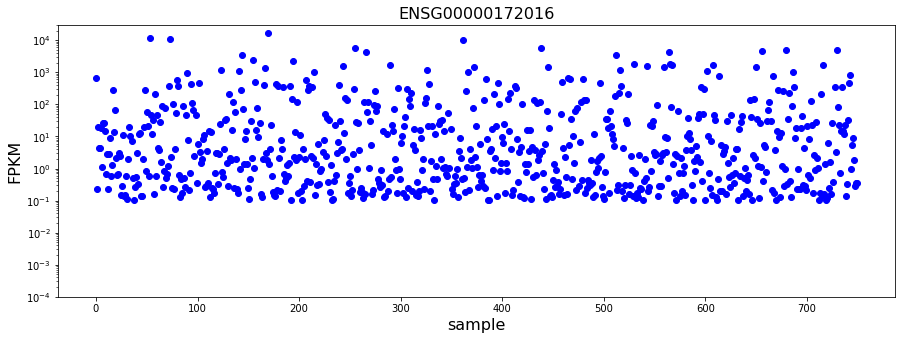

ENSG00000170323
mean: 37.802471
var: 221168.465140


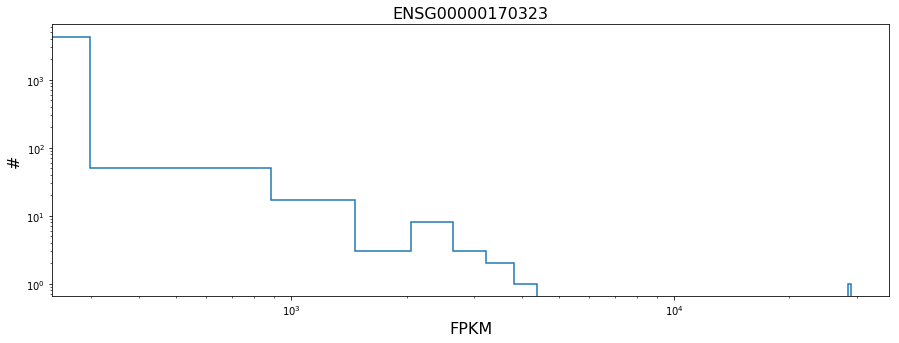

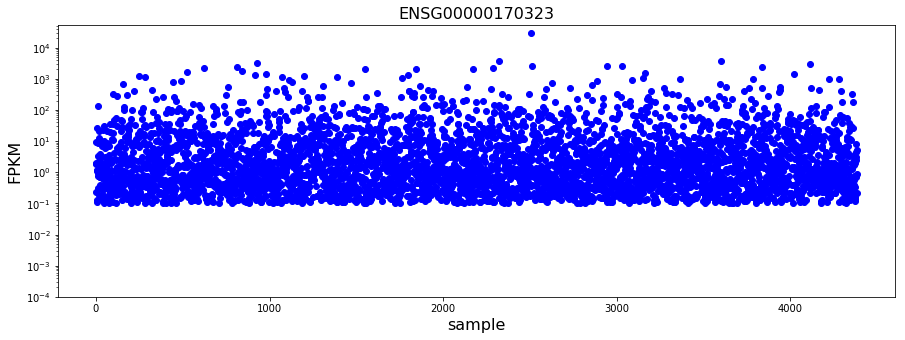

ENSG00000169344
mean: 373.213419
var: 1695602.044620


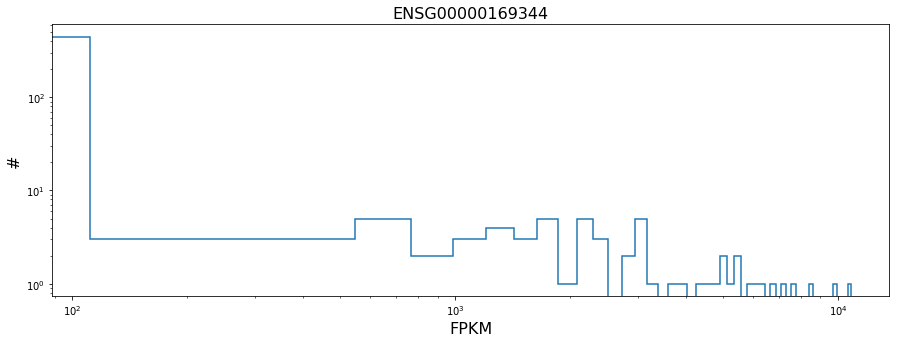

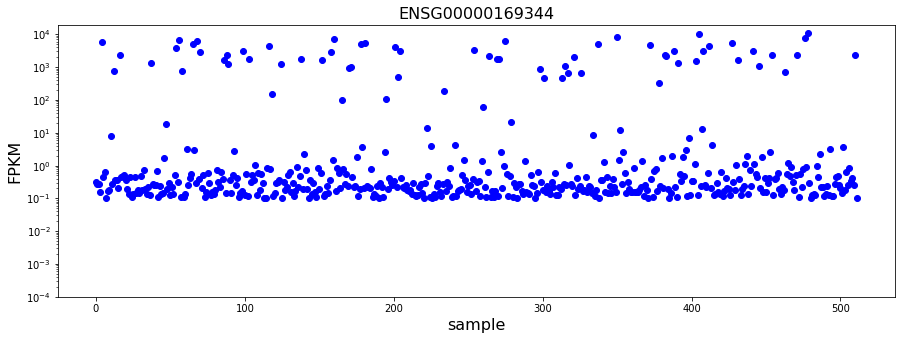

ENSG00000175535
mean: 704.061279
var: 25778995.730778


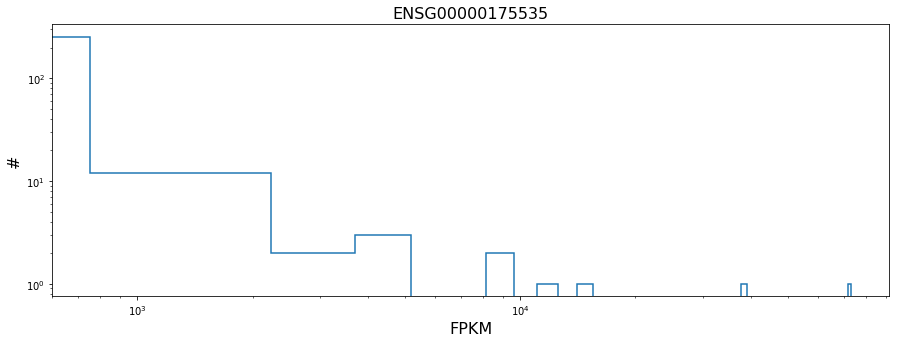

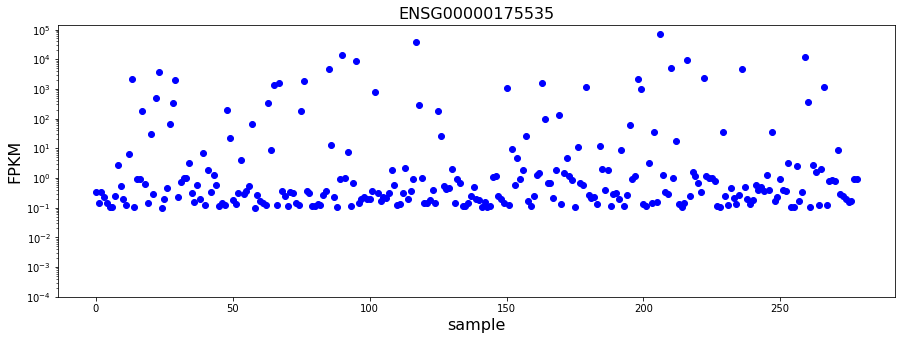

ENSG00000123454
mean: 70.679456
var: 219544.060343


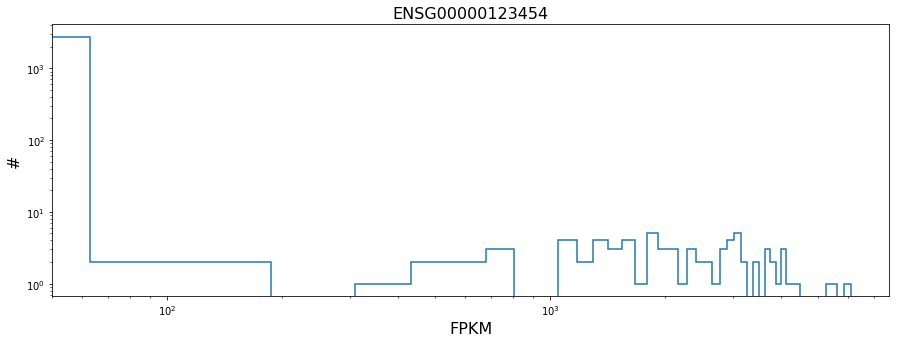

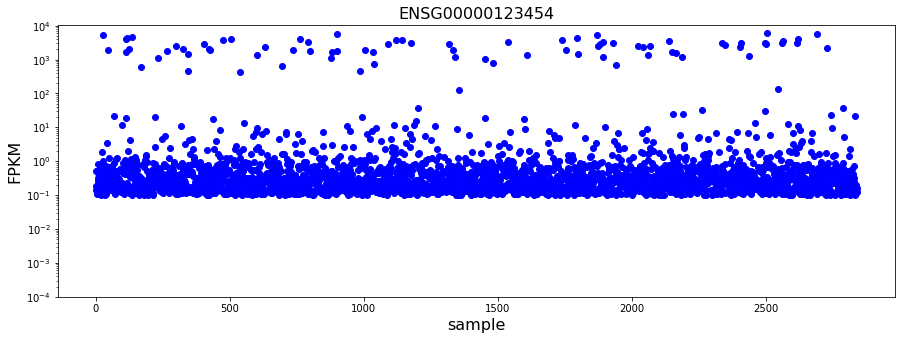

In [51]:
for gene in genesnames:
    print(gene['name'])
    print("mean: %f"%gene['avg'])
    print("var: %f"%gene['var'])
    genedistr(gene);
    geneplot(gene);
    #genecoord(gene);

In [397]:
gene = genesnames[-1]

In [467]:
def fitfunc(x, a, b, c, d, e):
    return np.exp(a*np.power(x,-b)) - 1 + e*(np.exp(np.exp(-(x-c)*(x-c)/d)) - 1)

[8.00000000e+03 1.35209931e+00 2.32393376e+03 4.64074571e+06
 4.36938978e+00]
768.7074829931972


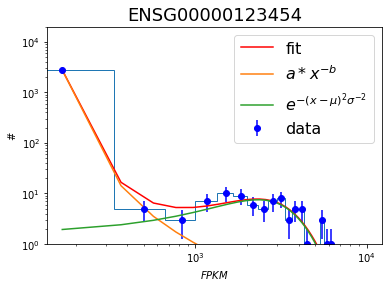

In [472]:
fig = plt.figure()
counts, bin_edges, _ = plt.hist(gene['data'], histtype='step', bins=30, range=(0,10000))
bin_centres = (bin_edges[1:]+bin_edges[:-1])/2.
plt.errorbar(bin_centres, counts, np.sqrt(counts), None, 'bo', label='data')
bounds = ([3000, 0, 100, 1000000, 1],[8000, 2, 5000, 5000000, 10])
popt, pcov = curve_fit(fitfunc, bin_centres, counts, bounds=bounds)
print(popt)
x = np.linspace(bin_centres[0],1e4)
print(x[np.argmin(fitfunc(x, *popt)[:10])])
plt.title(gene['name'], fontsize=18)
plt.xlabel("$FPKM$")
plt.ylabel("#")
plt.plot(x, fitfunc(x, *popt), 'r', label='fit')
plt.plot(x, np.exp(popt[0]*np.power(x,-popt[1])) - 1, label='$a*x^{-b}$')
plt.plot(x, popt[4]*np.exp(np.exp(-(x-popt[2])*(x-popt[2])/popt[3])) - popt[4], label="$e^{- (x-\mu)^2\sigma^{-2}}$")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1,2e4)
plt.legend(fontsize=16)
plt.show()

In [473]:
fig.savefig("genedistr_fit.pdf")

## Plot by class

In [20]:
types_of_gene = np.unique(df_mv['type_of_gene'].values)
types_of_gene

array(['ncRNA', 'protein-coding', 'pseudo', 'rRNA', 'scRNA', 'snRNA',
       'snoRNA', 'unknown'], dtype=object)

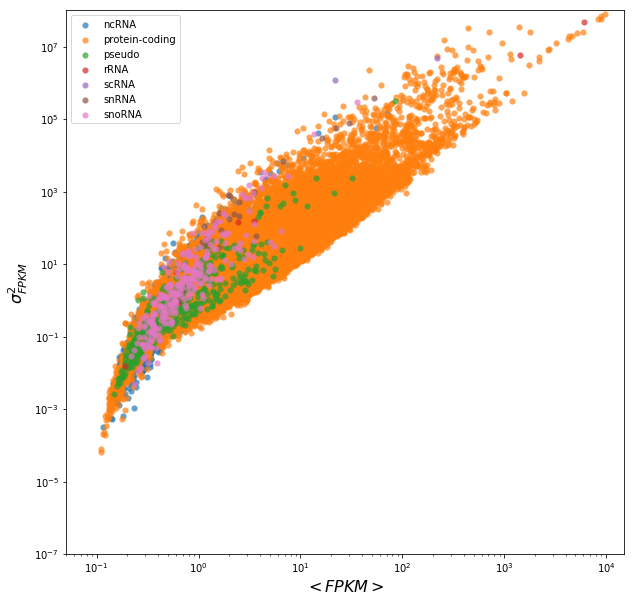

In [21]:
xscale='log'
yscale='log'
fig = plt.figure(figsize=(10,10))
#['ncRNA', 'rRNA', 'scRNA', 'snRNA', 'snoRNA']
for type_of_gene in types_of_gene[:-1]:
    subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
    plt.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale(yscale)
plt.xscale(xscale)
plt.ylim(1e-7, 1e8)
plt.xlim(5e-2, 1.5e4)
plt.legend()
plt.show()
fig.savefig('allgenes_classes_known_'+yscale+xscale+'.png')

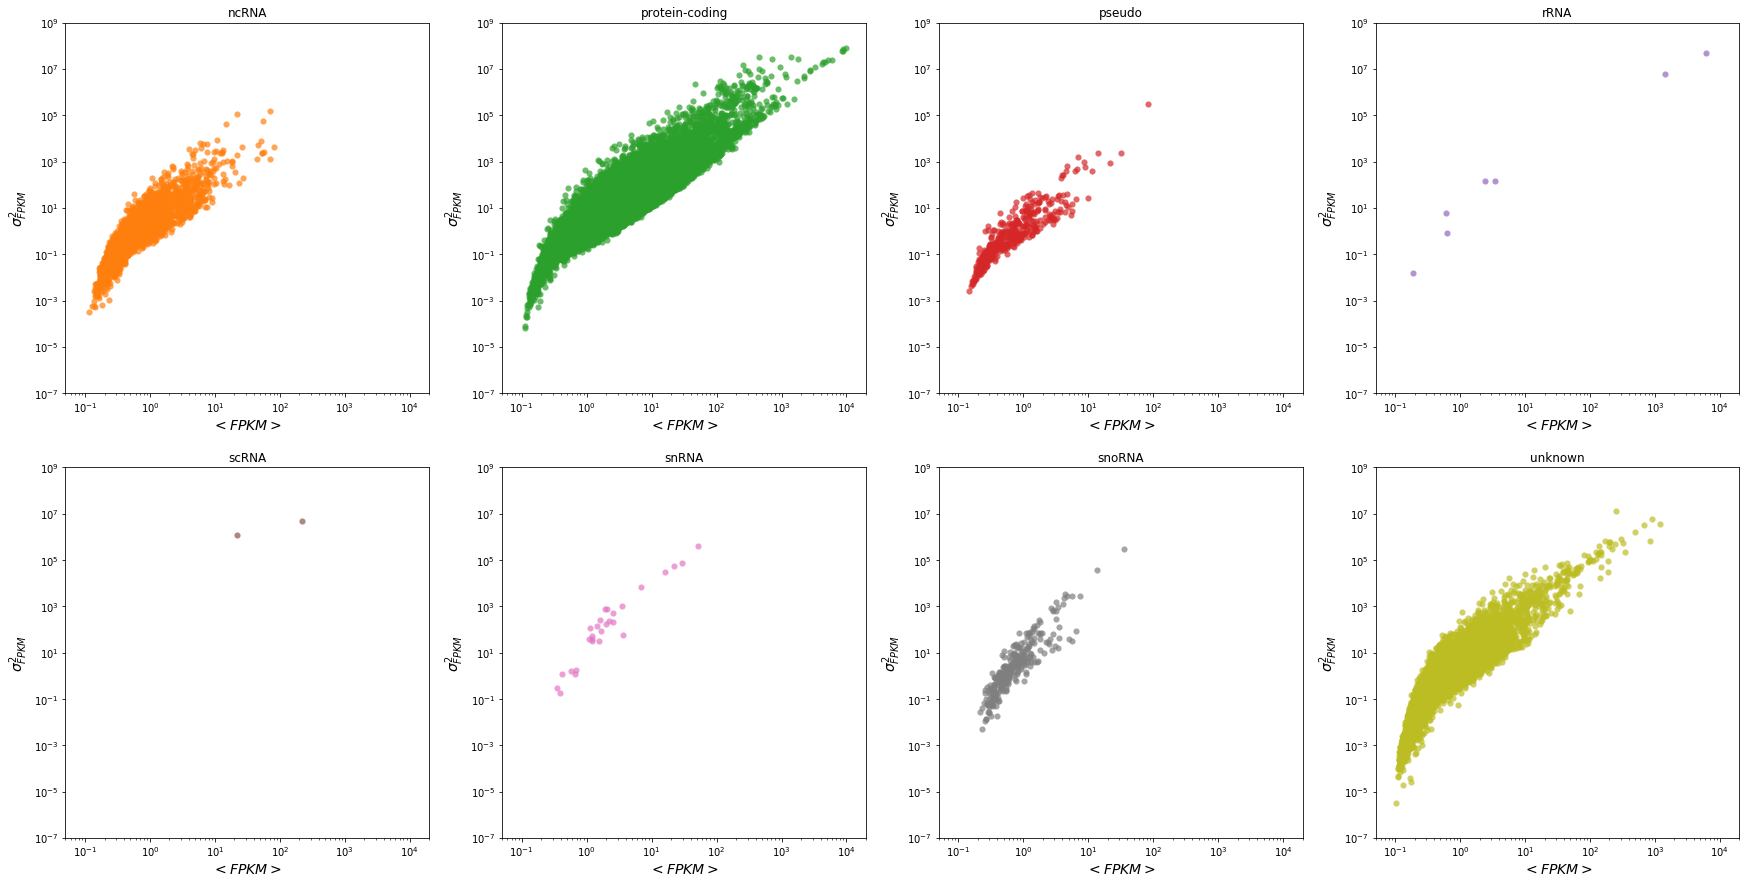

In [22]:
xscale='log'
yscale='log'
fig = plt.figure(figsize=(30,15))
pindex = 1
for type_of_gene in types_of_gene:
    ax = plt.subplot(2,4,pindex)
    subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
    ax.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1, c='C'+str(pindex))
    ax.set_title(type_of_gene)
    plt.xlabel("$<FPKM>$", fontsize=14)
    plt.ylabel("$\sigma^2_{FPKM}$", fontsize=14)
    plt.yscale(yscale)
    plt.xscale(xscale)
    plt.ylim(1e-7, 1e9)
    plt.xlim(5e-2, 2e4)
    pindex+=1
plt.show()
fig.savefig('allgenes_perclasses_'+yscale+xscale+'.png')

# null

In [ ]:
df_null = pd.read_csv(("%s/nullTable.csv"%working_dir))

In [ ]:
df_null.head()

In [ ]:
#gene = 456
genename = 'ENSG00000078237'
#genename = df['gene'][gene]
generow = df_null.loc[df_null['gene']==genename].loc[:,df_null.keys()[1:]].values.reshape(nfiles,1)
maxfpkm = np.max(generow)
bins = 15
width = maxfpkm / bins
_range = (0 - 0.5 * width, maxfpkm + 0.5 * width)
genedata = df_null.loc[df_null['gene']==genename].loc[:,df_null.keys()[1:]].values.reshape(nfiles,1)
print("name: %s"%genename)
try:
    q = mg.getgenes(genename[:15], 'name,symbol,refseq.rna,type_of_gene')[0]
    print("Descr: %s"%q['name'])
    print("Symbol: %s"%q['symbol'])
except:
    pass
print("FPKM mean: %10.2f"%np.average(genedata))
print("FPKM sigma: %10.2f"%np.std(genedata))
print("FPKM var: %10.2f"%np.var(genedata))

In [ ]:
means_null = [np.average(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]
variances_null = [np.var(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]

In [ ]:
fig=plt.figure()
plt.scatter(means, variances, label='data')
plt.scatter(means_null, sigmas_null, label='null')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [ ]:
fig.savefig("varmean_null.pdf")

## data size Heaps check

In [ ]:
col = df.loc[:,df.keys()[1]].values
np.sum(col)

In [ ]:
len(col[col.nonzero()])

In [ ]:
x = []
y = []
for i in range(1, 1000):
    col = df.loc[:,df.keys()[i]].values
    x.append(np.sum(col))
    y.append(len(col[col.nonzero()]))
plt.scatter(x,y)